# **1: Exploratory Data Analysis (EDA)**
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df['class'].value_counts()

,count
class,
poisonous,1400
edible,600


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0



Plotting histograms...


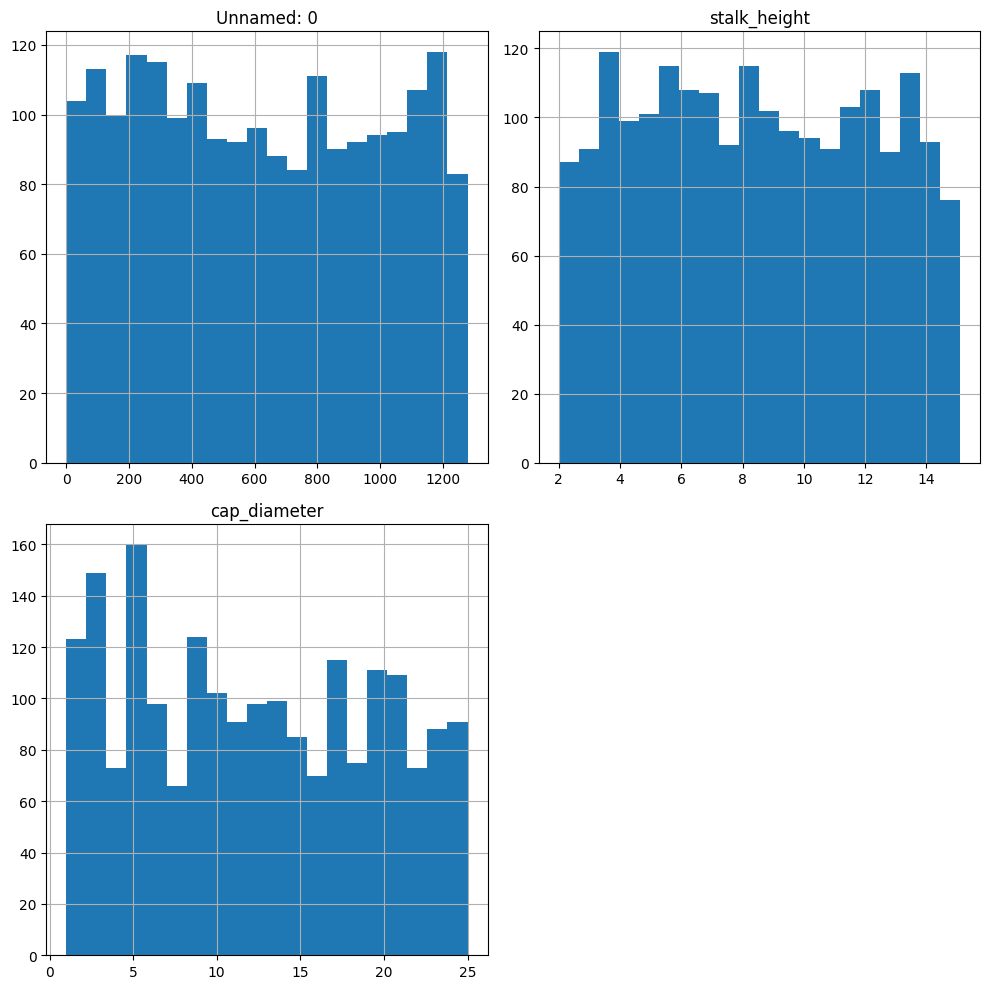

In [6]:
# Histograms for feature distributions
print("\nPlotting histograms...")
df.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()


Plotting box plots...


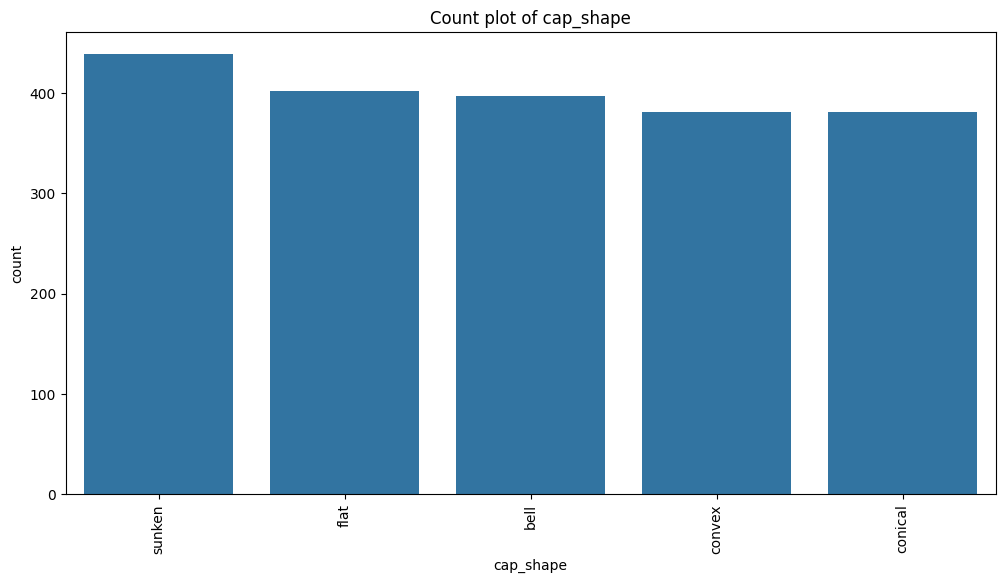

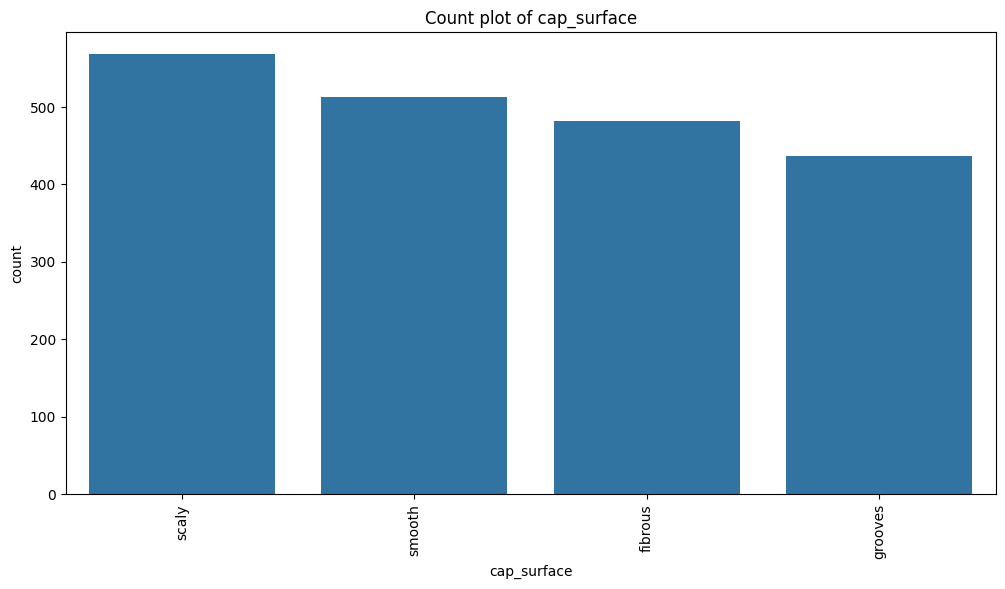

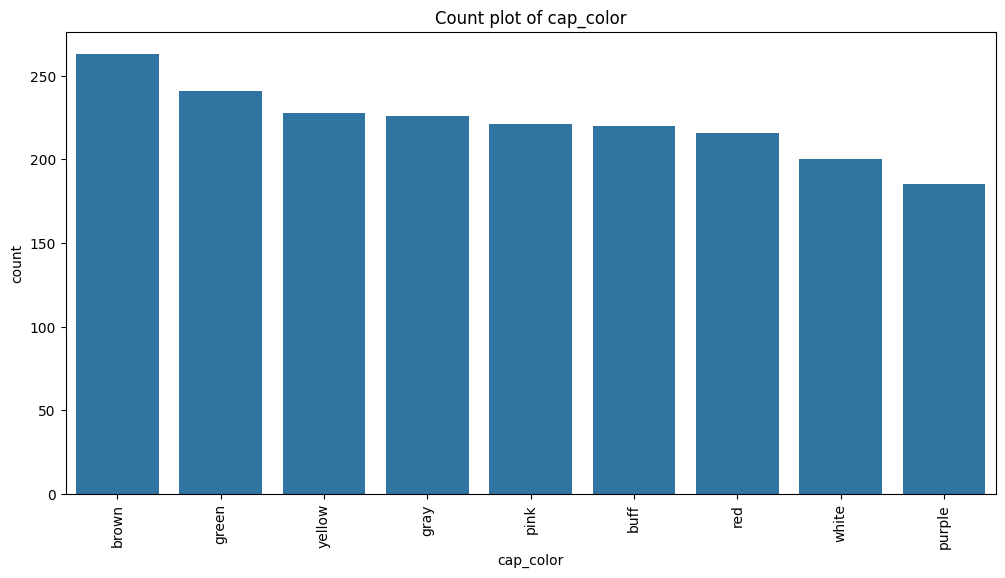

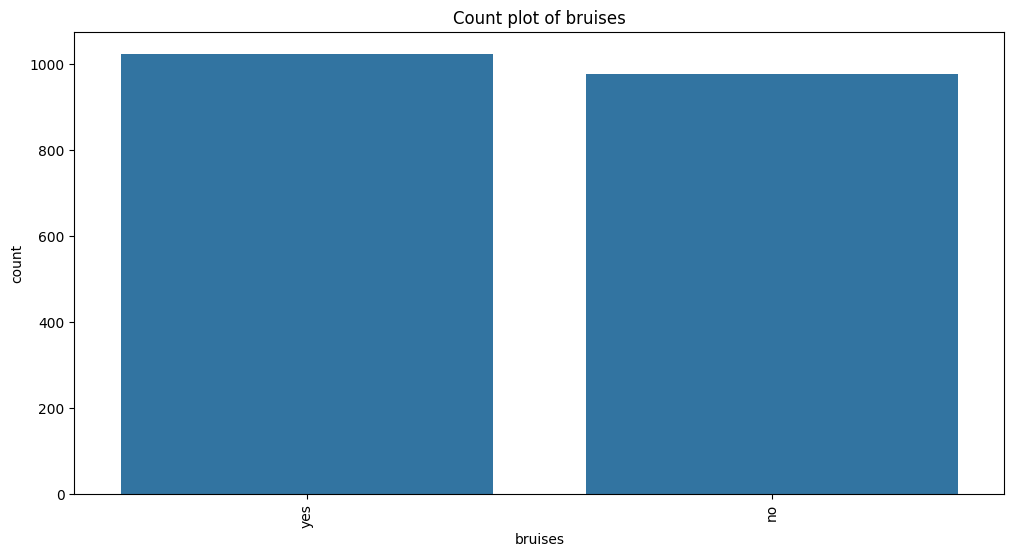

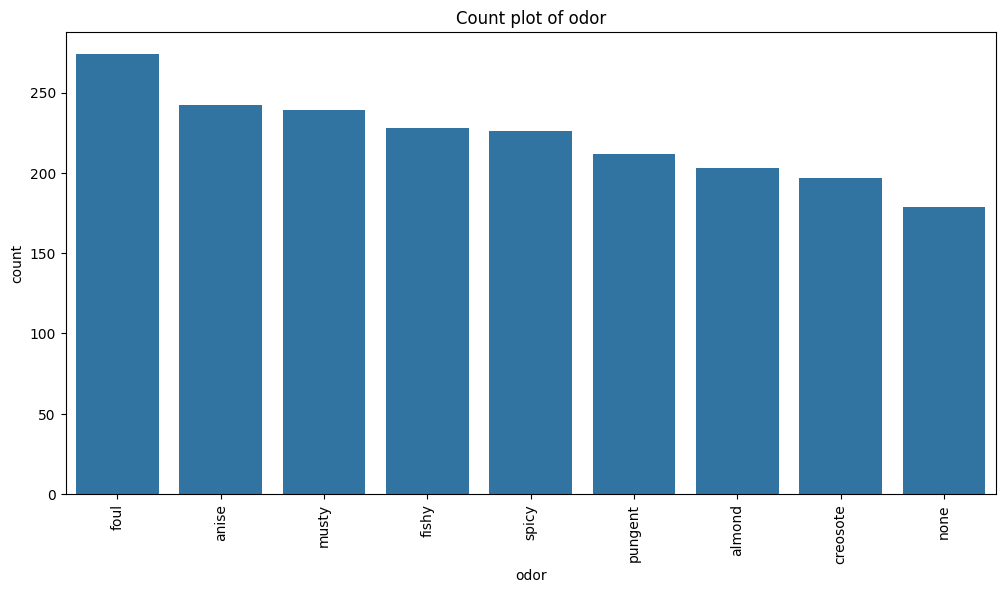

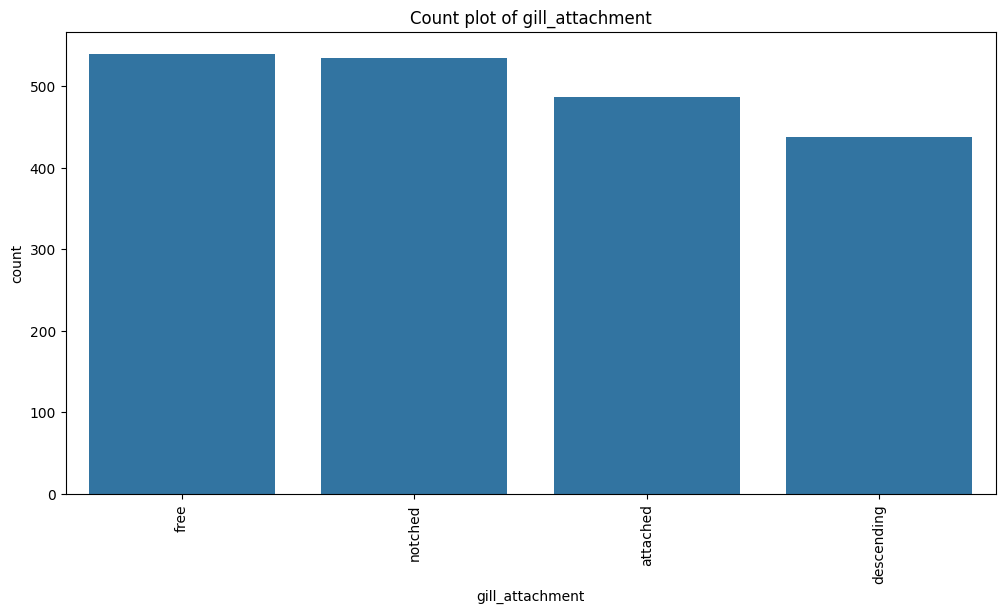

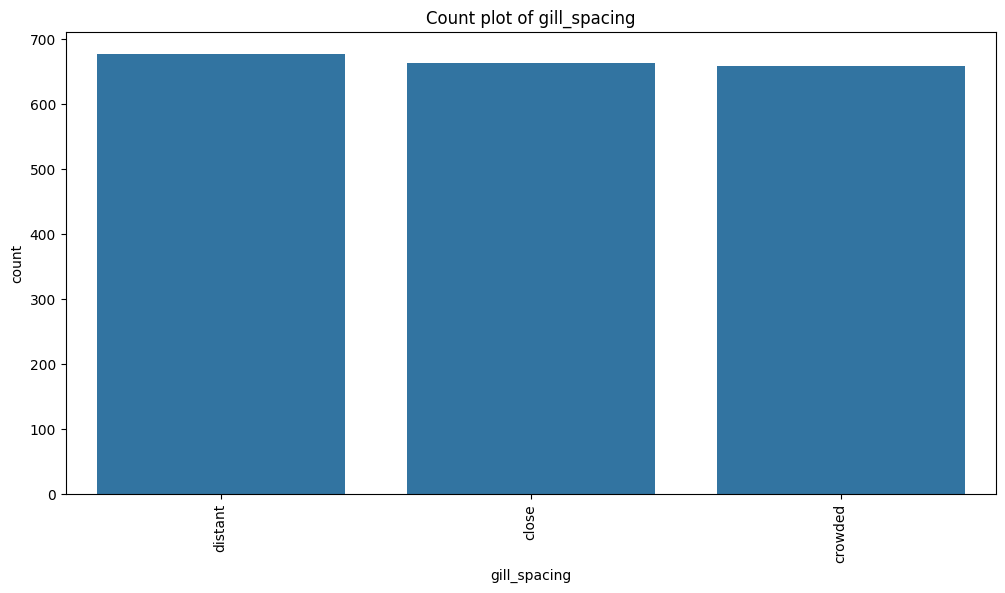

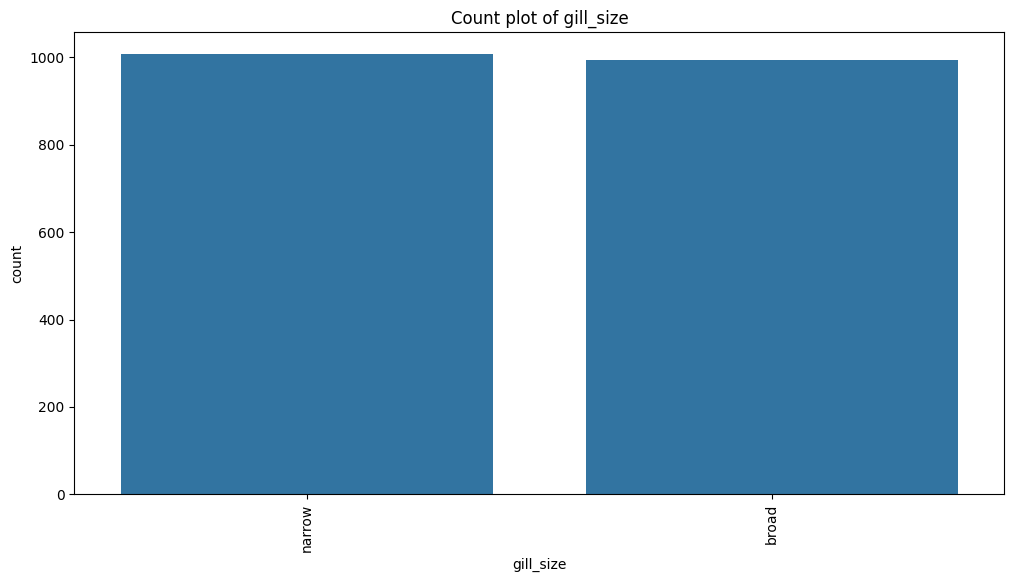

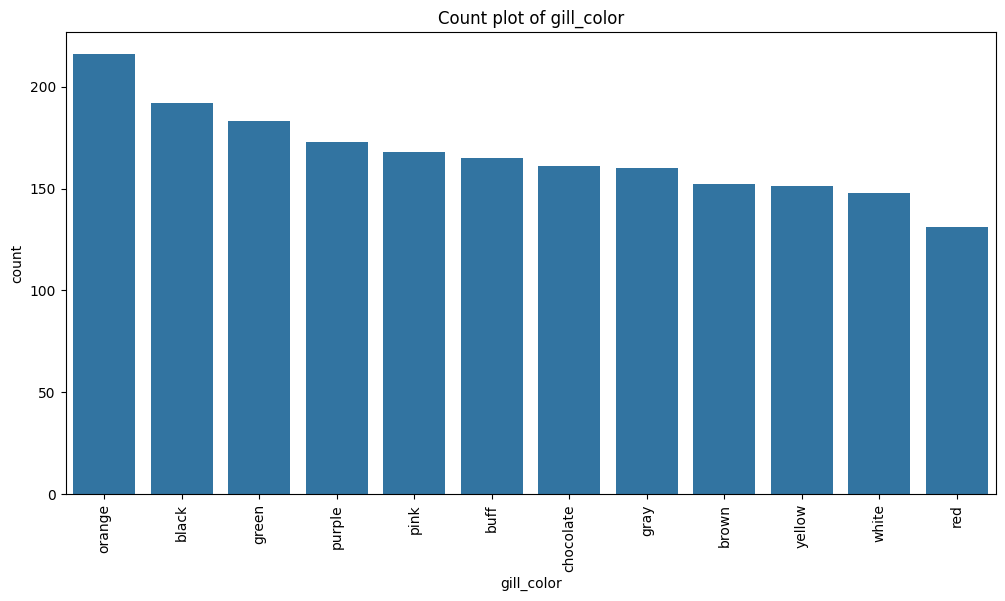

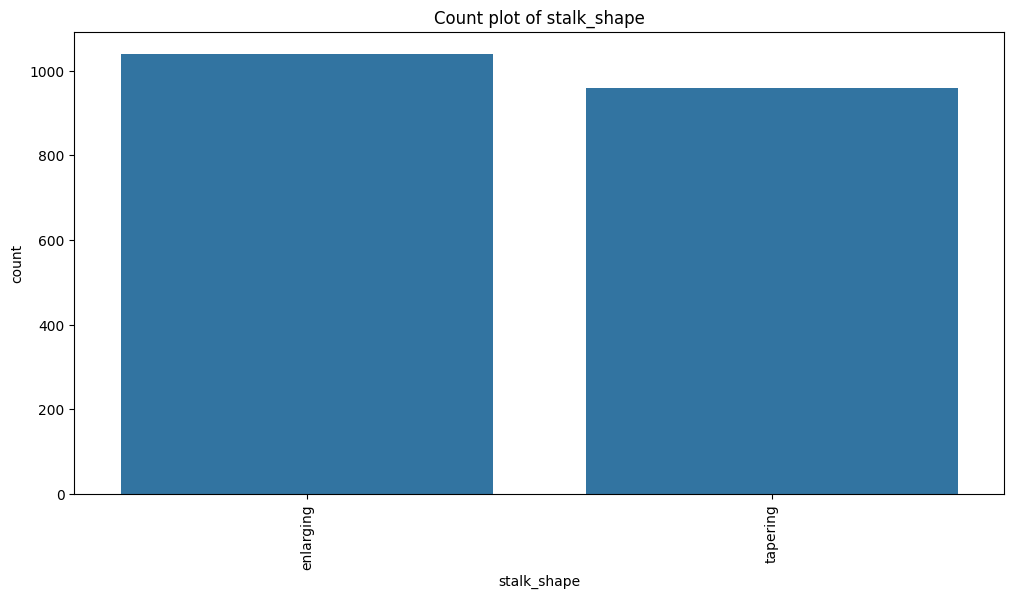

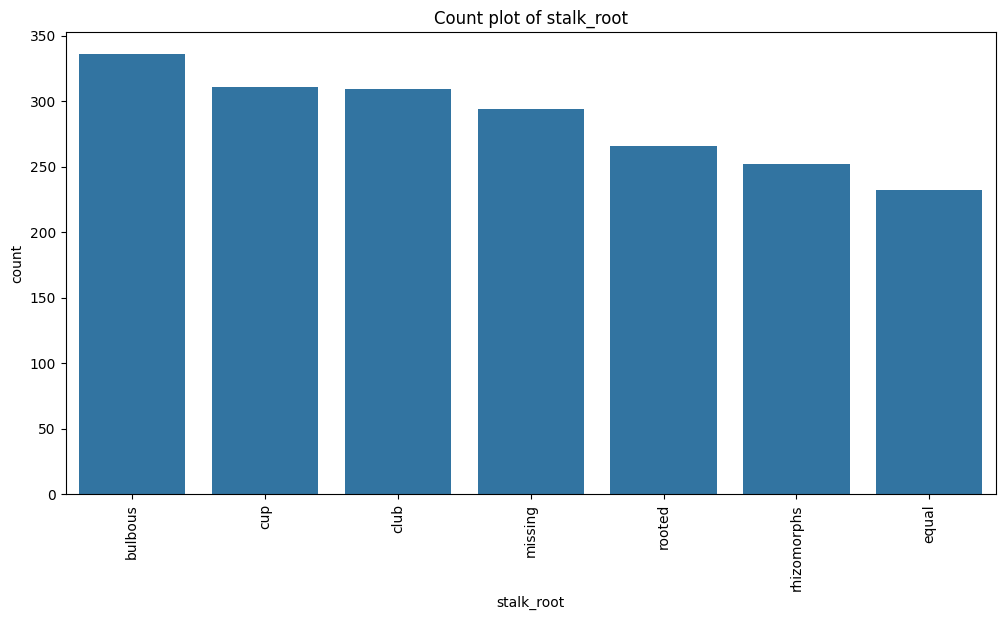

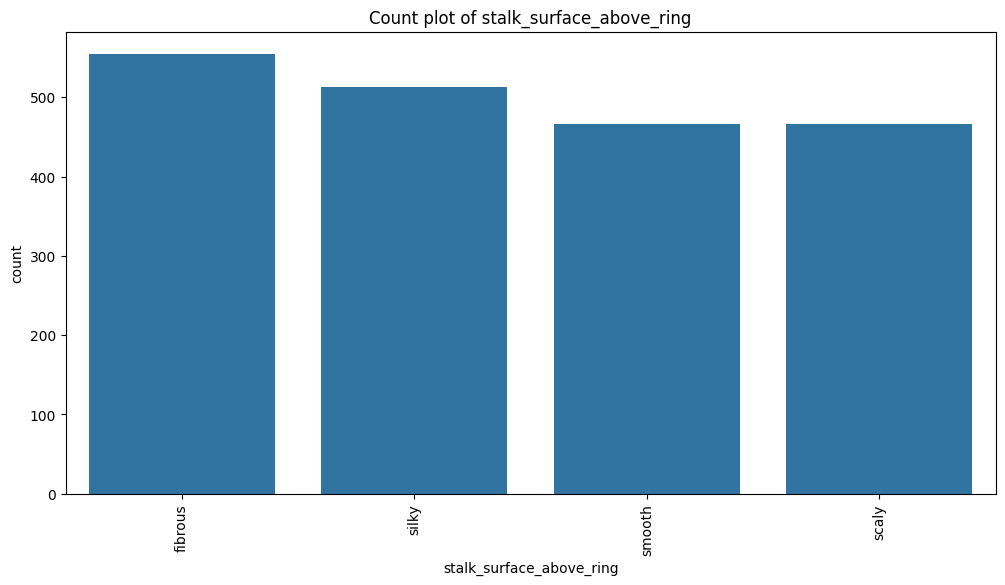

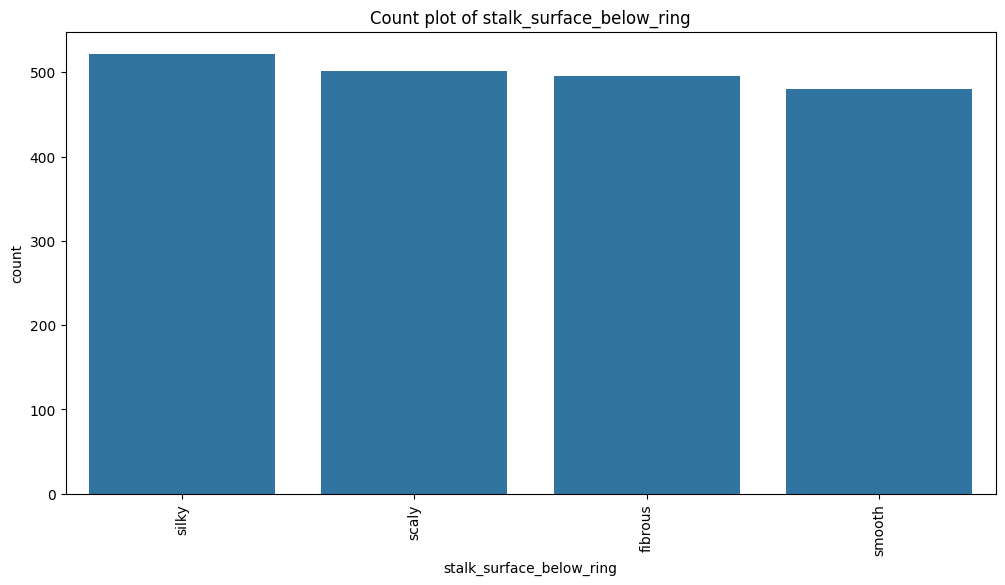

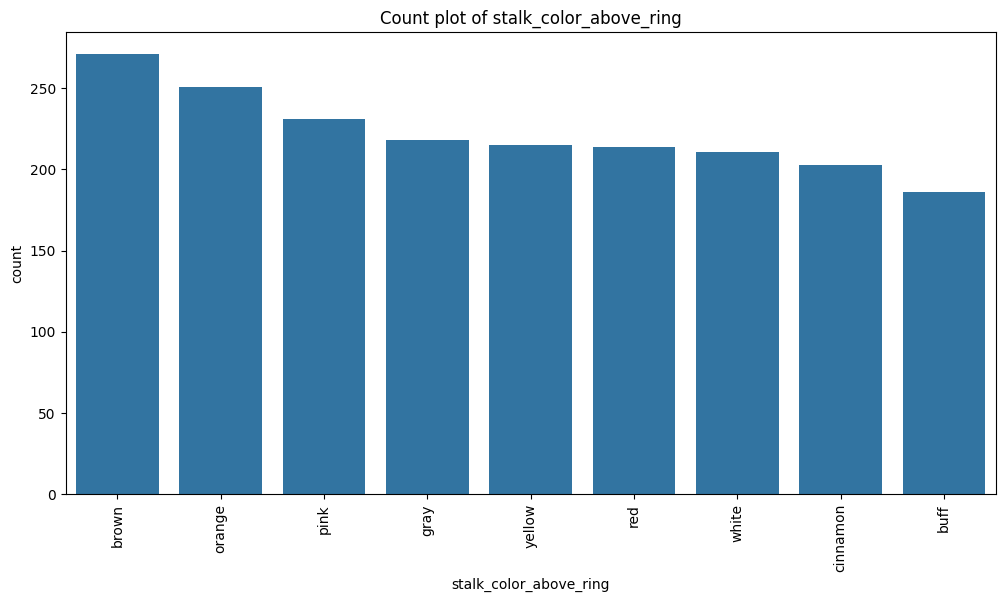

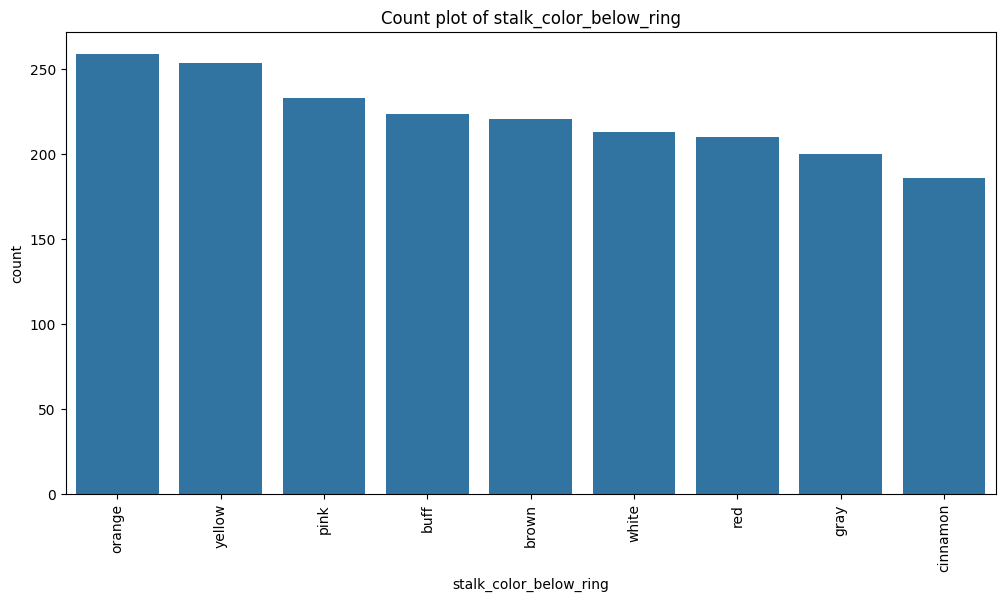

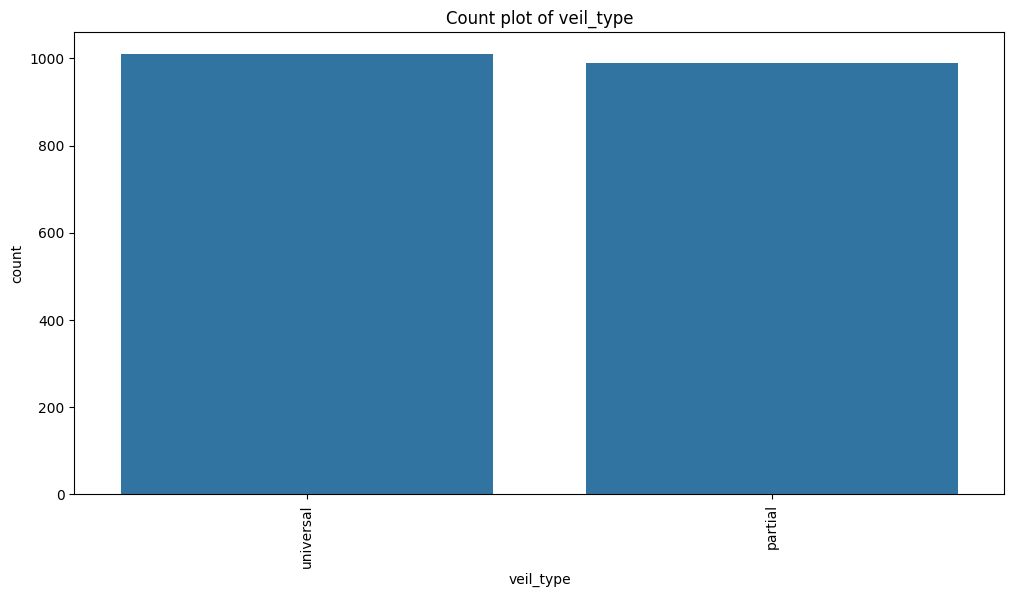

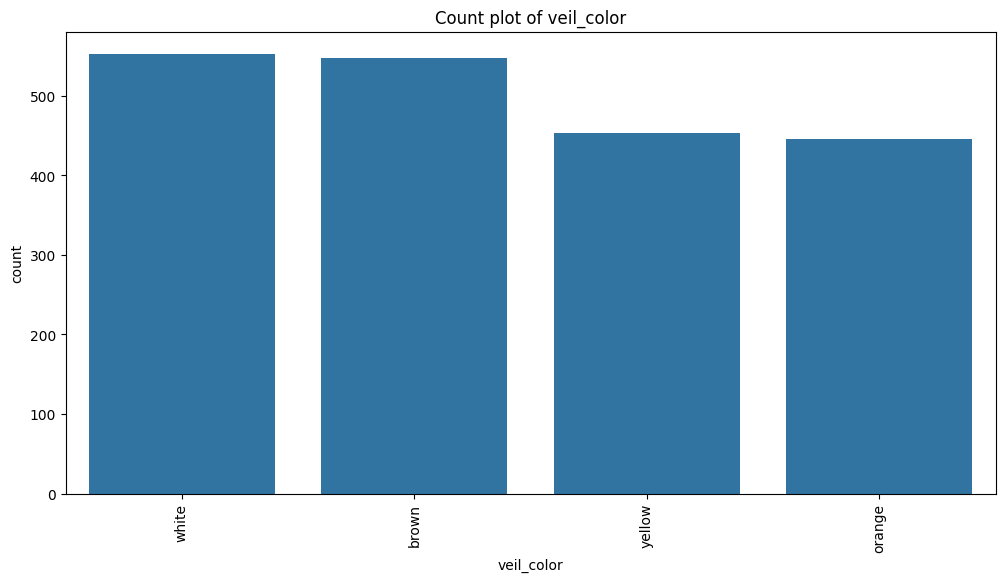

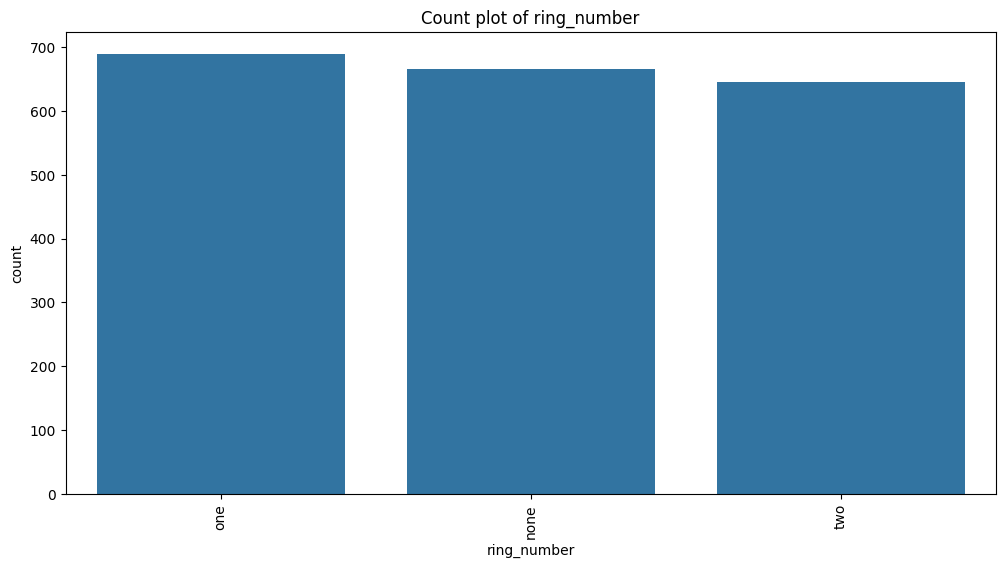

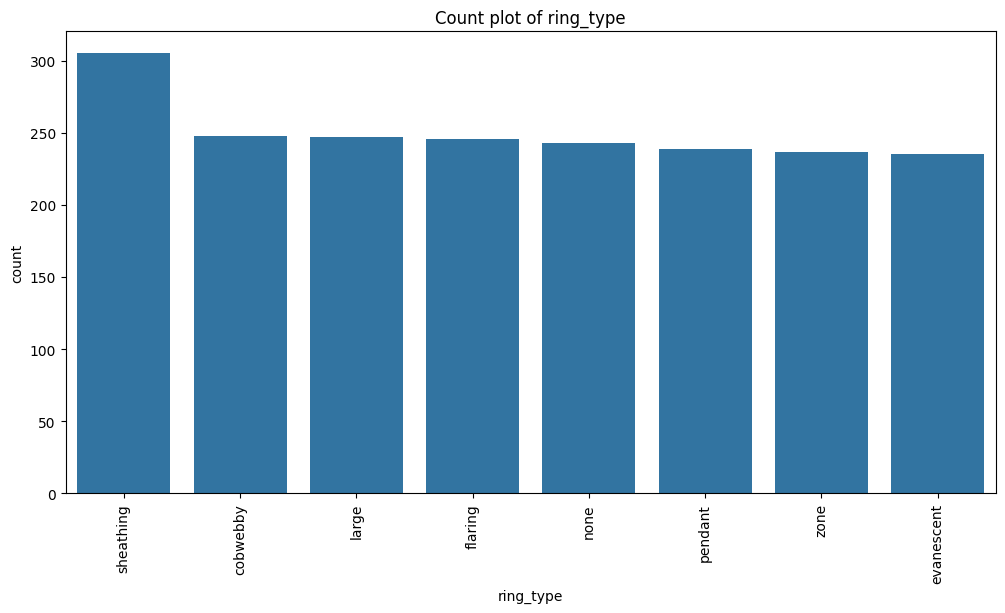

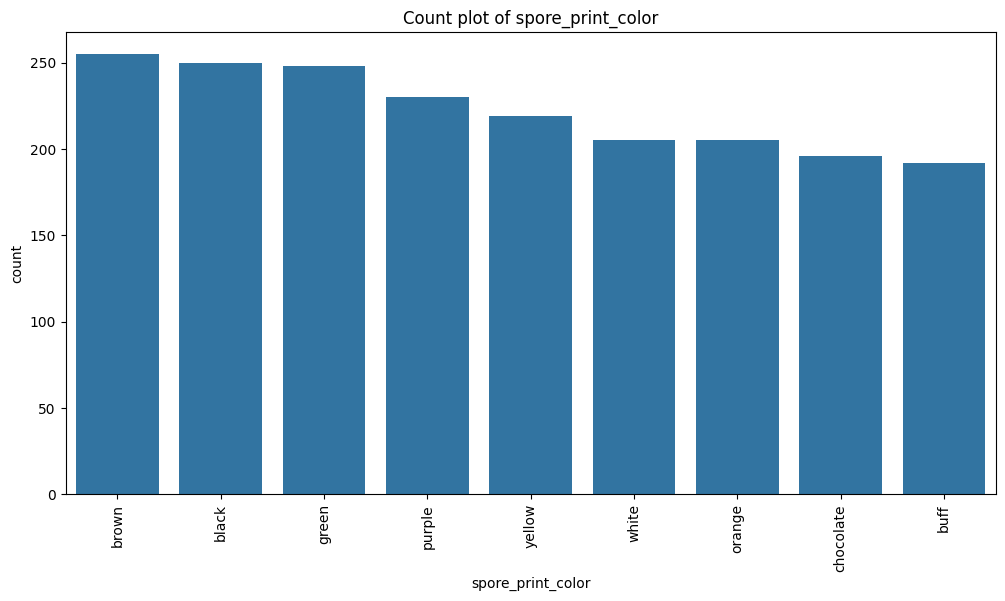

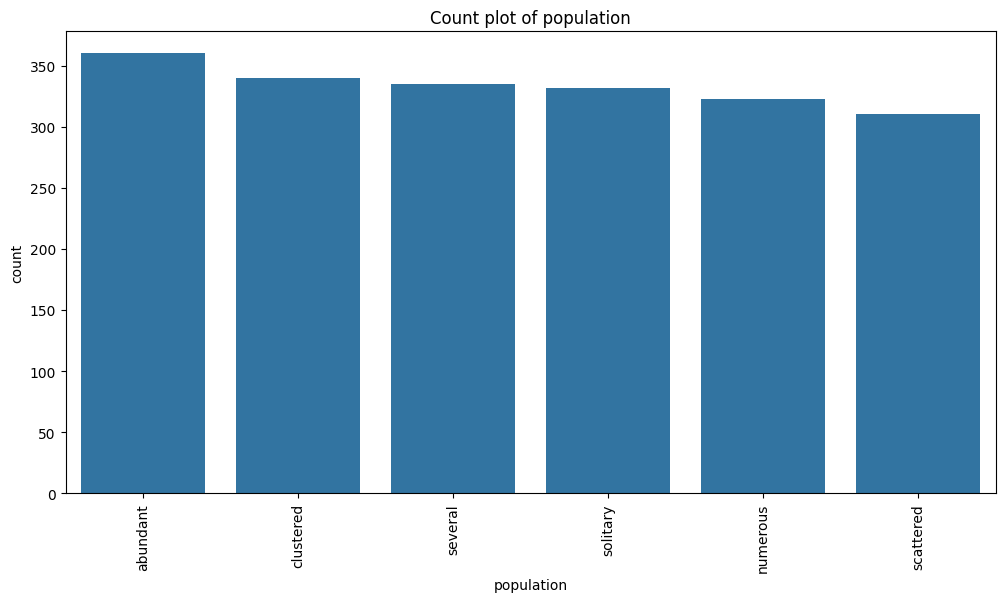

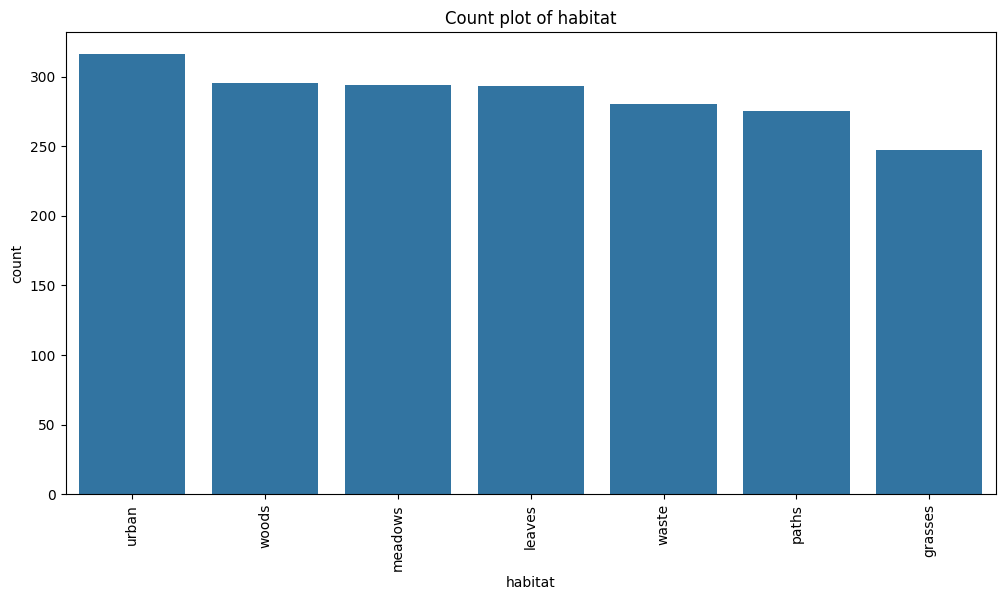

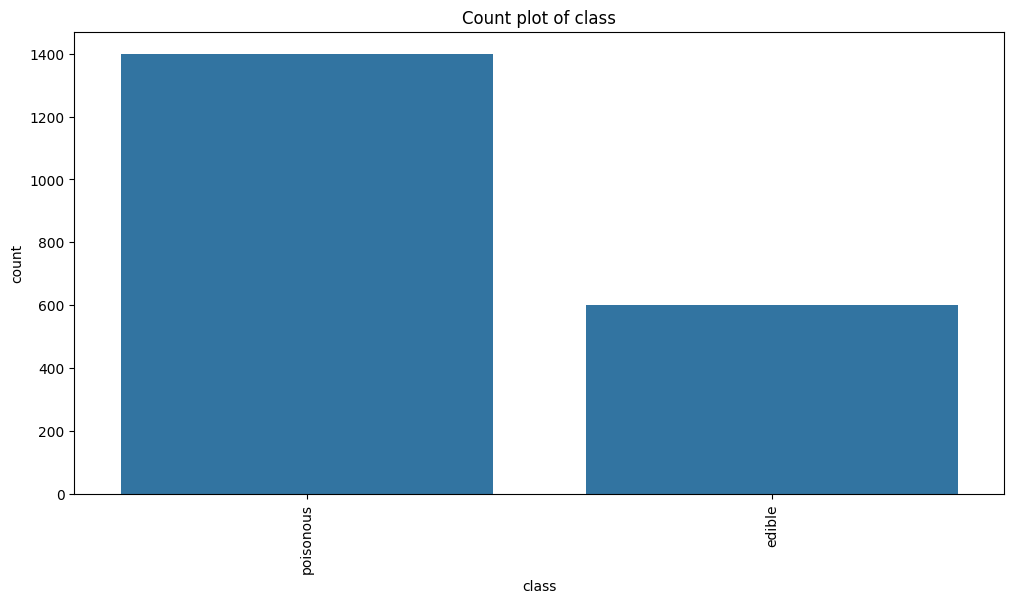

In [7]:
# Box plots for feature distributions
print("\nPlotting box plots...")
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    # Use countplot instead of boxplot for categorical data
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Count plot of {column}')
    plt.show()


Plotting density plots...


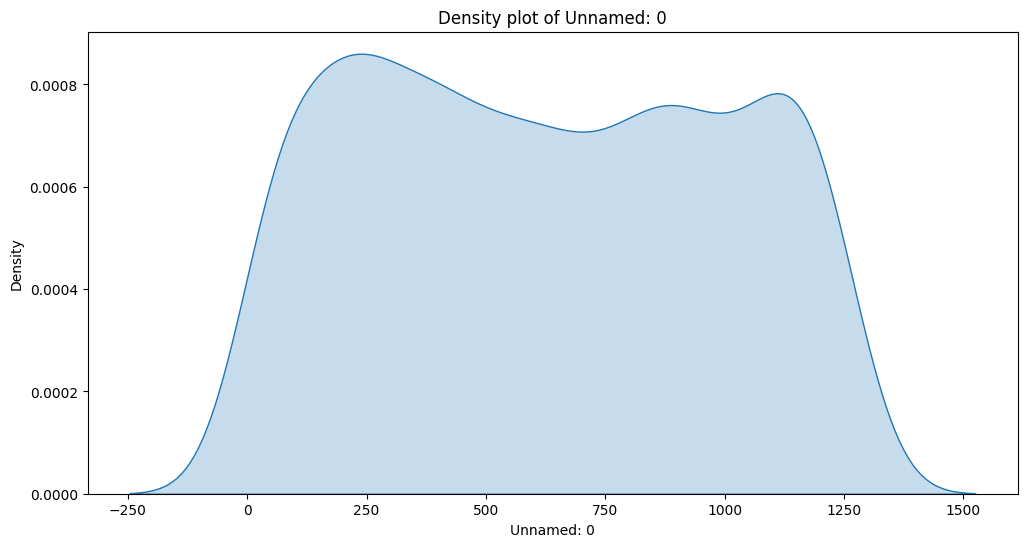

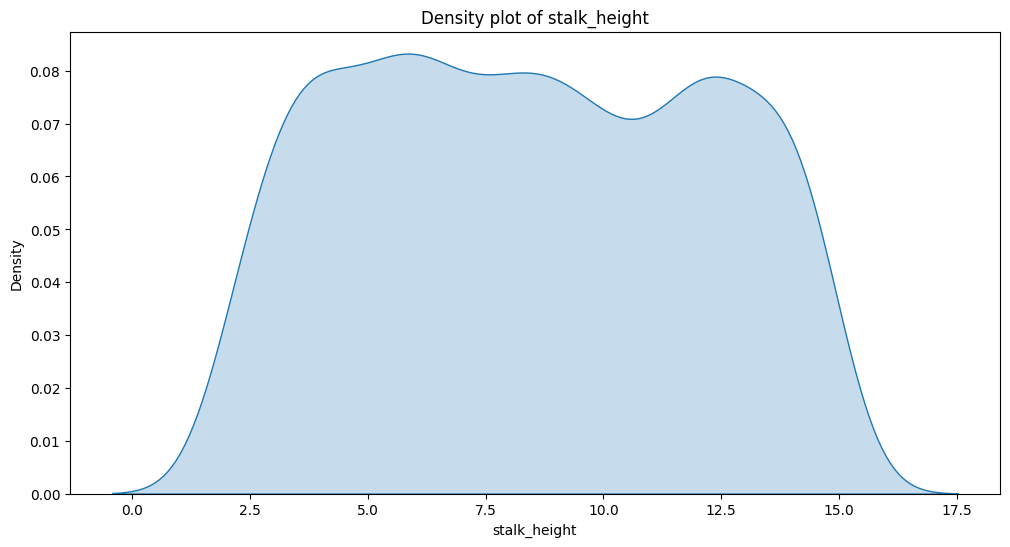

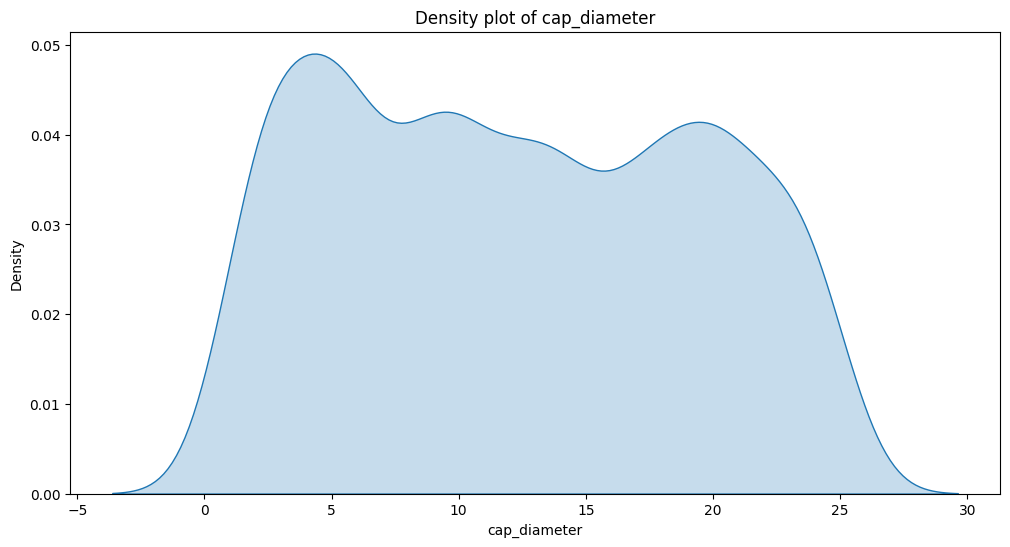

In [8]:
# Density plots for feature distributions
print("\nPlotting density plots...")
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density plot of {column}')
    plt.show()

In [9]:
# Investigate feature correlations (numerical features only)
print("\nCalculating correlations...")
corr_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical features for correlation calculation
print(corr_matrix)


Calculating correlations...
              Unnamed: 0  stalk_height  cap_diameter
Unnamed: 0      1.000000     -0.001508      0.051881
stalk_height   -0.001508      1.000000     -0.003486
cap_diameter    0.051881     -0.003486      1.000000



Plotting heatmap of feature correlations...


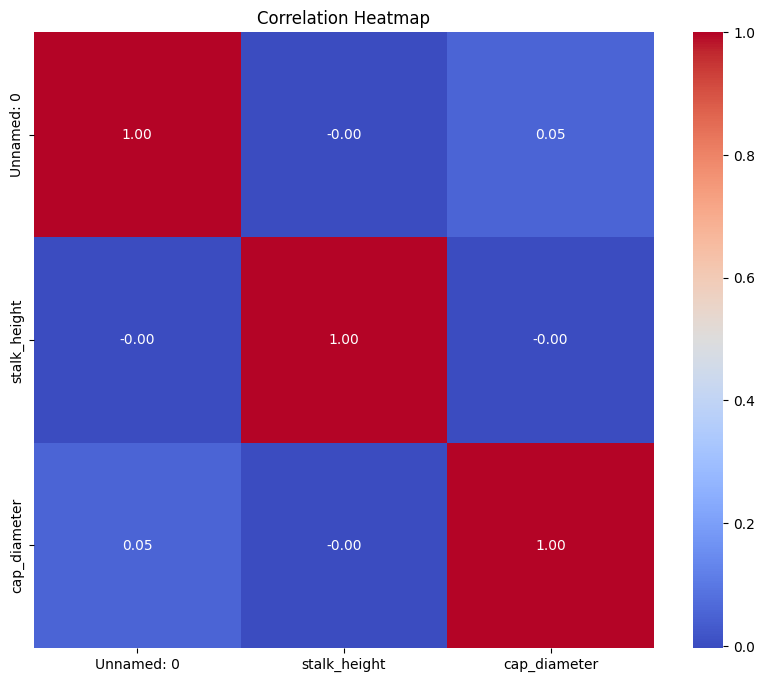

In [10]:
# Heatmap of feature correlations
print("\nPlotting heatmap of feature correlations...")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **2: Data Preprocessing**
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
df.info()# Display basic information to understand which columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [13]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [14]:
# Separate features and target variable (assuming 'class' is the target column)
X = df.drop('class', axis=1)
y = df['class']
X,y

(      Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
 0           1167    sunken       scaly     white      no    anise   
 1           1037    sunken     fibrous       red      no    anise   
 2            309      flat     grooves    purple     yes     foul   
 3            282      bell       scaly      pink     yes    fishy   
 4            820      flat      smooth    yellow     yes    musty   
 ...          ...       ...         ...       ...     ...      ...   
 1995         863    sunken       scaly     brown     yes     foul   
 1996        1160    sunken       scaly    purple     yes    musty   
 1997         265    convex     grooves     green     yes    fishy   
 1998         411      bell      smooth     white      no  pungent   
 1999        1073    convex       scaly    yellow     yes  pungent   
 
      gill_attachment gill_spacing gill_size gill_color  ...  \
 0         descending      distant     broad       pink  ...   
 1            notched      cro

In [15]:
# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [16]:
# Define the column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [17]:
# Apply the transformations
X_encoded = preprocessor.fit_transform(X)

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

In [19]:
print("Training and testing sets have been created.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training and testing sets have been created.
Training set size: 1400 samples
Testing set size: 600 samples


# **3: Data Visualization**
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance


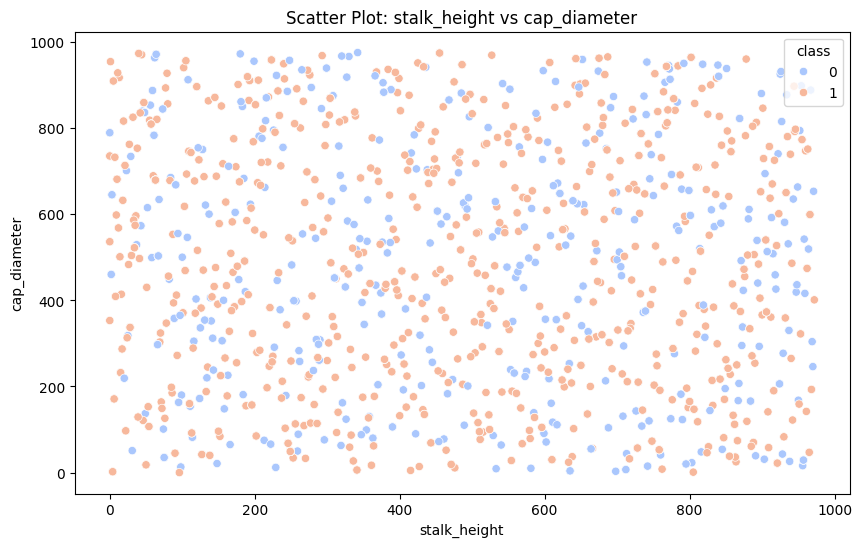

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features to numerical using LabelEncoder
encoder = LabelEncoder()

# Apply encoding to all columns since most of them are categorical
df_encoded = df.apply(encoder.fit_transform)

# Separate features and target variable
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Add the target variable back to the features dataframe for visualization
df_encoded['class'] = y

# Scatter plot for two selected features (replace 'cap_shape' and 'cap_surface' with actual feature names)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=df_encoded, palette='coolwarm') # Changed 'cap-shape' to 'cap_shape' to match the column name in the DataFrame.
plt.title('Scatter Plot: stalk_height vs cap_diameter')
plt.show()

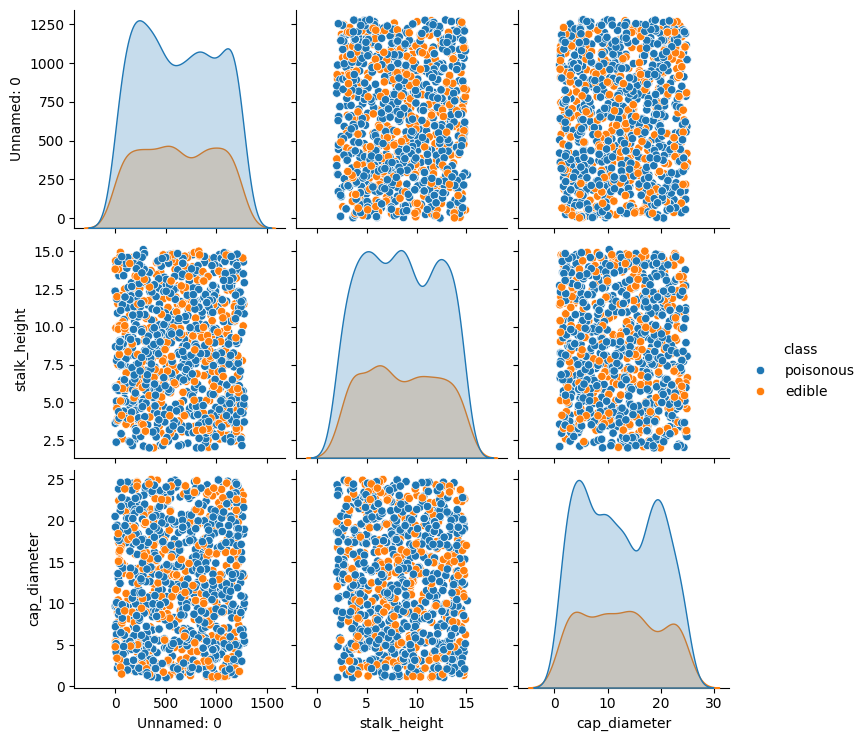

In [21]:
sns.pairplot(df, hue='class')
plt.show()

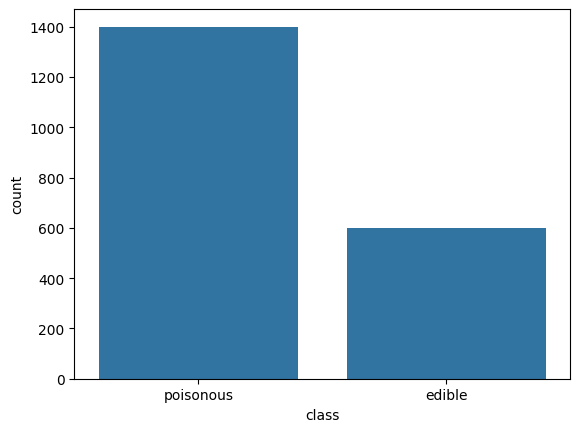

In [22]:
sns.countplot(x='class', data=df)
plt.show()

# **4: SVM Implementation**
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Encode categorical features to numerical using LabelEncoder
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separate features and target variable
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Initialize the SVM classifier (using linear kernel here, you can also try 'rbf' or others)
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6917
Precision: 0.3458
Recall: 0.5000
F1-Score: 0.4089

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



# **5: Visualization of SVM Results**
1.	Visualize classification results on the testing data.


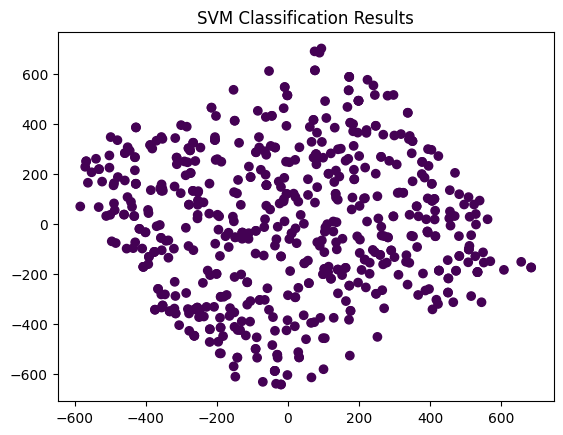

In [27]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('SVM Classification Results')
plt.show()

# **6: Parameter Tuning and Optimization**
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for tuning.     Defines the range of hyperparameters to be tested. add more values for C and gamma as needed.
param_grid = {
    'C' : [1,2,3],  # Regularization parameter.
    'kernel': ['rbf', 'linear'],  # Different kernel types.
    'gamma' : [1,2,3]  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'.
}


In [29]:
svm_model = SVC()  # Initialize the SVM classifier.

In [30]:
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
# Grid search -  Automatically evaluates all combinations of the hyperparameters and finds the best one based on cross-validation.

# Train the model on the training data with GridSearchCV.
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.875 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.832 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.832 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.818 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.832 total time=   0.1s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.704 total time=  25.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.704 total time=  22.9s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.704 total time=  19.9s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.704 total time=  22.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.704 total time=  21.9s
[CV 1/5] END ..........C=1, gamma=2, kernel=rbf;, score=0.875 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=2, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': [1, 2, 3],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [31]:
# Display the best parameters.
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [32]:
# Make predictions.
y_pred_optimized = grid_search.predict(X_test)

# Evaluate the optimized model.
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

# Print the classification report.
print(classification_report(y_test, y_pred_optimized))

Optimized Accuracy: 0.8816666666666667
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



#**Comparison and Analysis**
1.Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).                        
2.Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.                       
3.Discuss practical implications of SVM in real-world classification tasks.

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# List of different kernels to compare
kernels = ['linear', 'poly', 'rbf']     #(Linear, Polynomial, Radial Basis Function)
results = {}

# Iterate over kernels and train the SVM model for each
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Store the results
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

    # Output the classification report for each kernel
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Display comparison of accuracies
for kernel, accuracy in results.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

Kernel: linear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



Kernel: poly
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



Kernel: rbf
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0

2) SVM’s strengths and weaknesses:                                     
Strengths :                                                
Works with High-Dimensional Data : Given that the Mushroom dataset has a large number of categorical variables, SVM can handle these with appropriate encoding and parameter tuning, as it performs well in high-dimensional spaces.

Effective for Complex Feature Relationships : SVMs perform well when there is a clear separation between classes, as seen in numerical features like stalk_height and cap_diameter.

Weaknesses :                                                     
Parameter Sensitivity : SVM performance depends heavily on hyperparameters like C, gamma, and kernel choice. As the dataset is categorical and numerical, tuning becomes important for maximizing performance.

sensitive to class imbalance: If one class is dominant (as seen in the class distribution visualization), SVM may favor the larger class, which can hurt overall performance.

3) Discussion of practical implication:

Binary Classification : SVM excels in binary classification problems, which is applicable in many areas, such as spam detection, disease diagnosis, or image classification.

Clear Decision Boundaries : In situations where data classes are separable, SVM can provide a clear and well-defined decision boundary. For the Mushroom dataset, SVM helps classify mushrooms into poisonous or edible based on the features provided.

Flexibility with Non-linearity : Using kernels like RBF, SVM can adapt to non-linear problems, which are common in real-world datasets with complex relationships between variables.